
#Normalización y codificación de señales

EJERCICIO: Normaliza la dimension 2

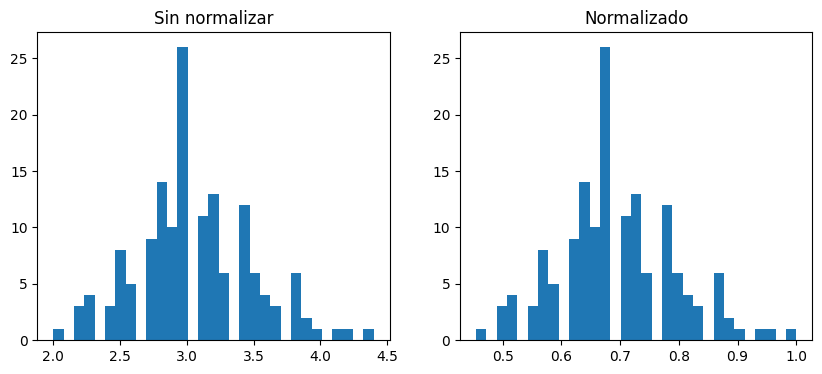

In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
import numpy as np
iris = datasets.load_iris()

X = iris.data
X_n2 = X[:,1] / np.max(X[:,1])

# Mostrando los graficos
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,1],31), plt.title('Sin normalizar')
plt.subplot(1,2,2), plt.hist(X_n2,31), plt.title('Normalizado');

EJERCICIO: Normaliza la dimension 2 quitando el minimo

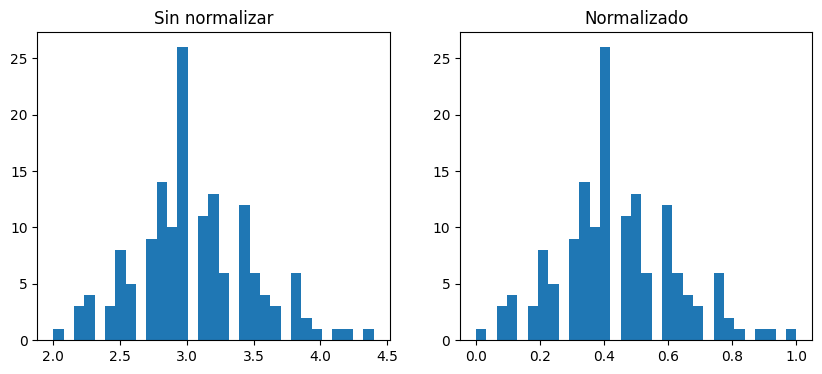

In [6]:
X_n = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,1],31), plt.title('Sin normalizar')
plt.subplot(1,2,2), plt.hist(X_n,31), plt.title('Normalizado');

EJERCICIO: Estandariza la dimension 2

(<Axes: title={'center': 'estandarizando'}>,
 (array([ 1.,  3.,  4.,  3.,  8.,  5., 23., 10., 26., 11., 13.,  6., 12.,
         10.,  3.,  6.,  2.,  1.,  1.,  1.,  1.]),
  array([-2.43394714, -2.17086512, -1.9077831 , -1.64470109, -1.38161907,
         -1.11853705, -0.85545503, -0.59237301, -0.32929099, -0.06620897,
          0.19687304,  0.45995506,  0.72303708,  0.9861191 ,  1.24920112,
          1.51228314,  1.77536516,  2.03844717,  2.30152919,  2.56461121,
          2.82769323,  3.09077525]),
  <BarContainer object of 21 artists>),
 Text(0.5, 1.0, 'estandarizando'))

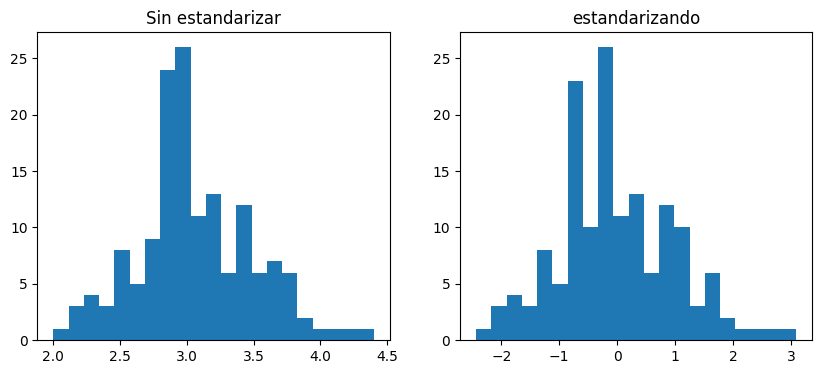

In [7]:
X_n = (X[:,1] - np.mean(X[:,1])) / (np.std(X[:,1]))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,1],21), plt.title('Sin estandarizar')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('estandarizando')

EJERCICIO: Explica la diferencia entre los tres métodos anteriores
R.- Las diferencia son:
* Normalizacion: Escala los datos en los rango de 0 a 1. Se calcula dividiendo cada valor del conjunto de datos por la máxima amplitud.

* Normalizacion quitando el minimo: Similar a la normalización estándar, pero se elimina el mínimo antes de realizar la escala. Se calcula dividiendo cada valor del conjunto de datos por la amplitud, excluyendo el valor mínimo.

* Estandarización: Estandariza los datos para que tengan una media de 0 y una desviación estándar de 1. Se calcula restándole a cada valor del conjunto de datos la media del conjunto de datos y luego dividiendo el valor por la desviación estándar

EJERCICIO: Hay otros modelos, pruébalos. ¿Qué es lo que hacen en los datos?
- `preprocessing.MinMaxScaler()`
- `preprocessing.MaxAbsScaler()`

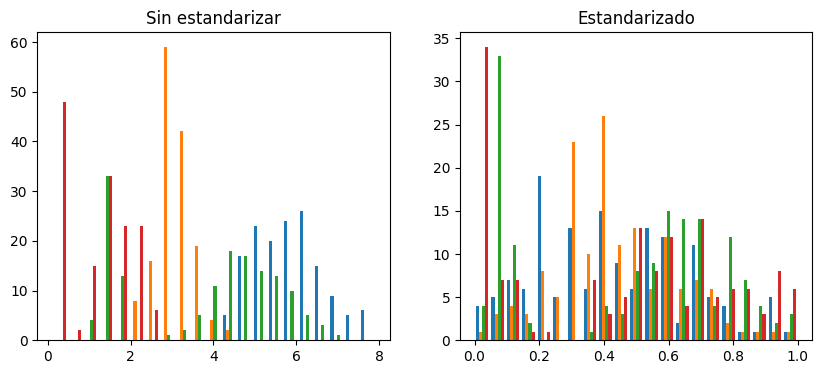

In [23]:
from sklearn import preprocessing
# Creamos la funcion para estandarizar y se la entrena
MinMaxScaler = preprocessing.MinMaxScaler().fit(X)

# Estandarizados los datos
X_n = MinMaxScaler.transform(X)

# Se muestra las estandarizaciones aplicados en todas las dimensiones
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X,21), plt.title('Sin estandarizar');
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('Estandarizado');

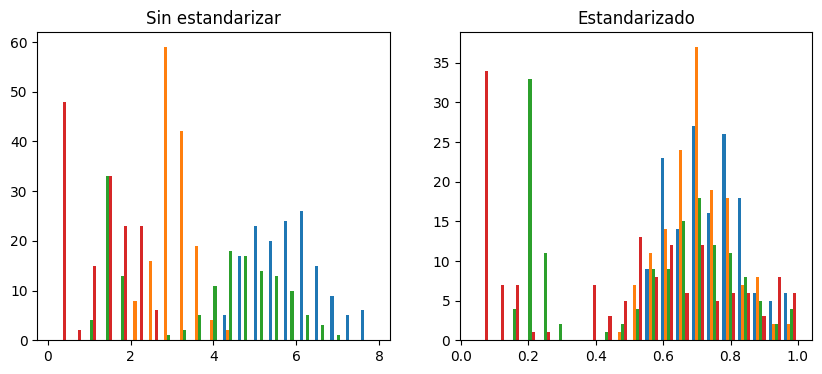

In [22]:
# Creamos la funcion para estandarizar y se la entrena
MaxAbsscaler = preprocessing.MaxAbsScaler().fit(X)

# Estandarizados los datos
X_n = MaxAbsscaler.transform(X)

# Se muestra las estandarizaciones aplicados en todas las dimensiones
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X,21), plt.title('Sin estandarizar');
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('Estandarizado');

EJERCICIO: El uso de modelos de normalización nos permite normalizar otros data sets utilizando exactamente la misma transformación. Esto es útil para normalizar los datos de entrenamiento, test y validación de la misma forma utilizando solo la informacióón de los datos de entrenamiento.

Particiona los datos originales en train/test, entrena el modelo de normalización utilizando los datos de train, y normaliza los datos de train y test utilizando este modelo. Ayuda: utiliza la función `train_test_split` de sklearn.

Datos de entrenamiento originales:
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]

Datos de entrenamiento normalizados:
[[0.08823529 0.66666667 0.         0.04166667]
 [0.41176471 1.         0.0877193  0.125     ]
 [0.70588235 0.45833333 0.59649123 0.54166667]
 [0.14705882 0.58333333 0.10526316 0.04166667]
 [0.02941176 0.5        0.05263158 0.04166667]]

Datos de prueba originales:
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]

Datos de prueba normalizados:
[[0.52941176 0.33333333 0.64912281 0.45833333]
 [0.41176471 0.75       0.12280702 0.08333333]
 [1.         0.25       1.03508772 0.91666667]
 [0.5        0.375      0.61403509 0.58333333]
 [0.73529412 0.33333333 0.66666667 0.54166667]]


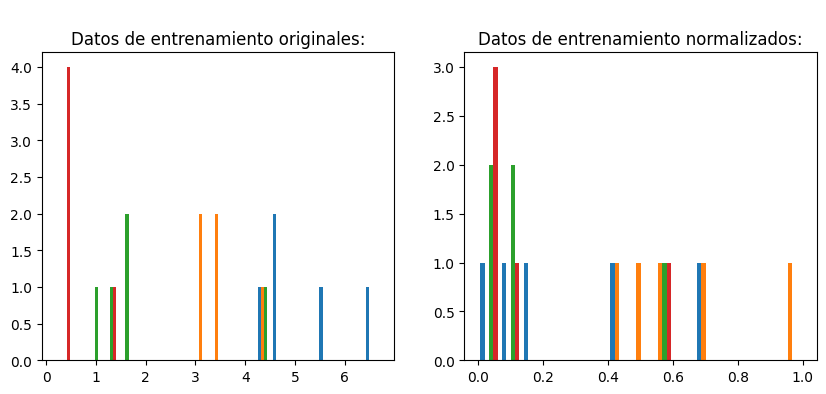

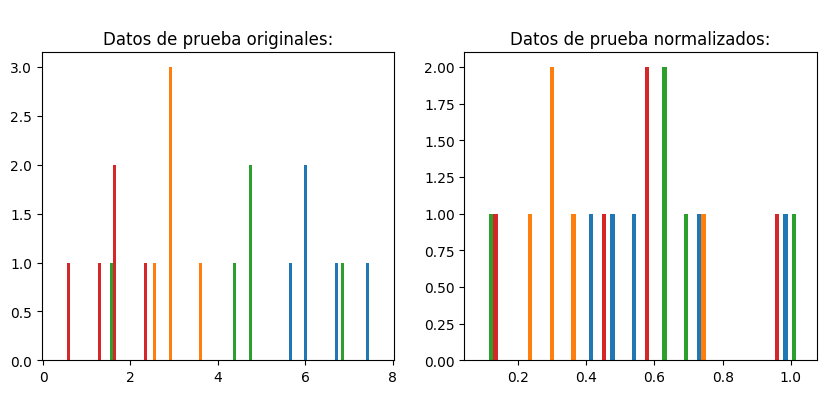

In [41]:
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos Iris
X, y = iris.data, iris.target

# Particion de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de normalización
escala = MinMaxScaler()

# Ajustando el modelo de normalización de los datos de entrenamiento
escala.fit(X_train)

# Aplicando la transformación a los datos de entrenamiento y de prueba
X_train_norm = escala.transform(X_train)
X_test_norm = escala.transform(X_test)

# Se muestra las estandarizaciones
#Datos de Entrenamiento
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X_train[:5, :],21), plt.title("Datos de entrenamiento originales:");
plt.subplot(1,2,2), plt.hist(X_train_norm[:5, :],15), plt.title("\nDatos de entrenamiento normalizados:");

print("Datos de entrenamiento originales:")
print(X_train[:5, :])

print("\nDatos de entrenamiento normalizados:")
print(X_train_norm[:5, :])

#Datos de Prueba
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X_test[:5, :],21), plt.title("\nDatos de prueba originales:");
plt.subplot(1,2,2), plt.hist(X_test_norm[:5, :],15), plt.title("\nDatos de prueba normalizados:");

print("\nDatos de prueba originales:")
print(X_test[:5, :])

print("\nDatos de prueba normalizados:")
print(X_test_norm[:5, :])

EJERCICIO: Transforma los datos de train para que tengan distribucion Gaussiana

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (120). n_quantiles is set to n_samples.
  warnings.warn(


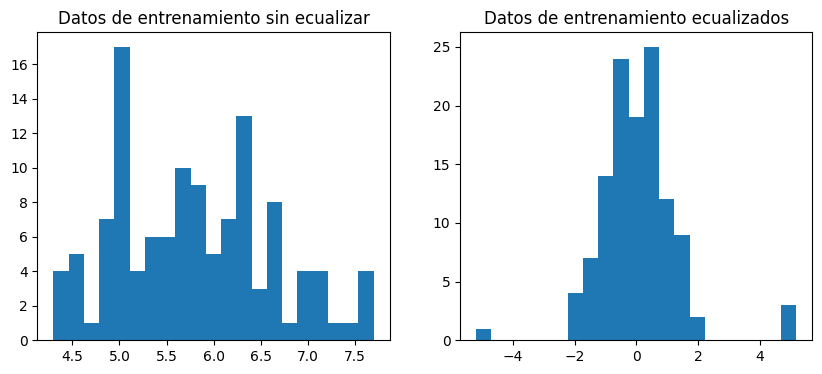

In [51]:
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = preprocessing.QuantileTransformer(random_state=0,output_distribution='normal')

X_train_trans = quantile_transformer.fit_transform(X_train)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X_train[:,0],21), plt.title('Datos de entrenamiento sin ecualizar')
plt.subplot(1,2,2), plt.hist(X_train_trans[:,0],21), plt.title('Datos de entrenamiento ecualizados');

EJERCICIO: Transforma los datos de test utilizando la transformacion de los datos de train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (30). n_quantiles is set to n_samples.
  warnings.warn(


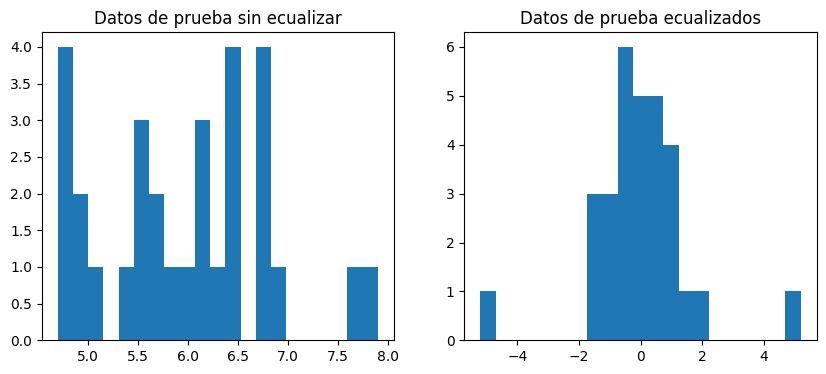

In [52]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0,output_distribution='normal')

X_test_trans = quantile_transformer.fit_transform(X_test)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X_test[:,0],21), plt.title('Datos de prueba sin ecualizar')
plt.subplot(1,2,2), plt.hist(X_test_trans[:,0],21), plt.title('Datos de prueba ecualizados');

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (120). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (30). n_quantiles is set to n_samples.
  warnings.warn(


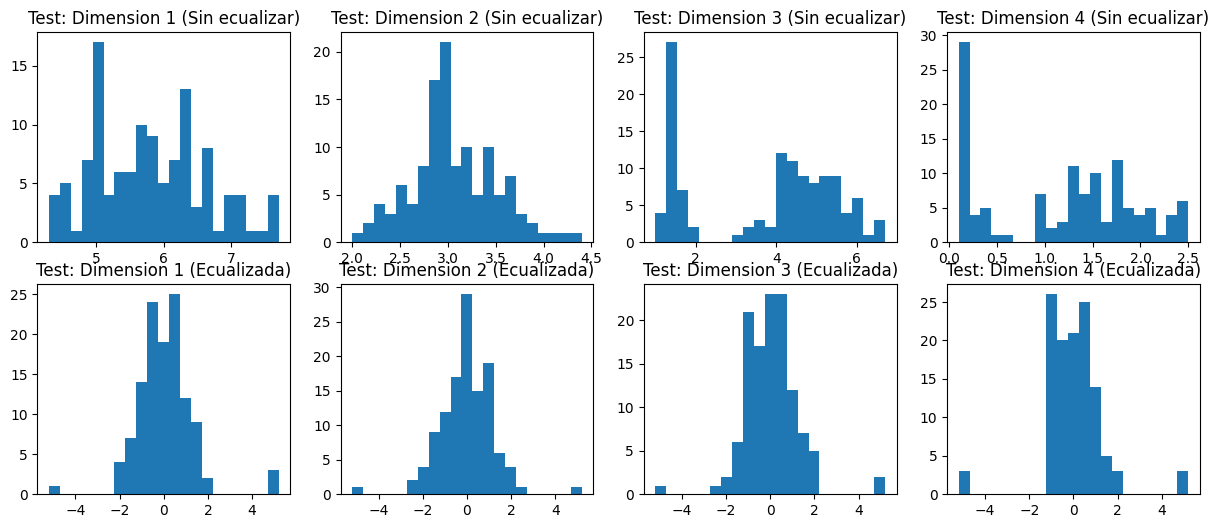

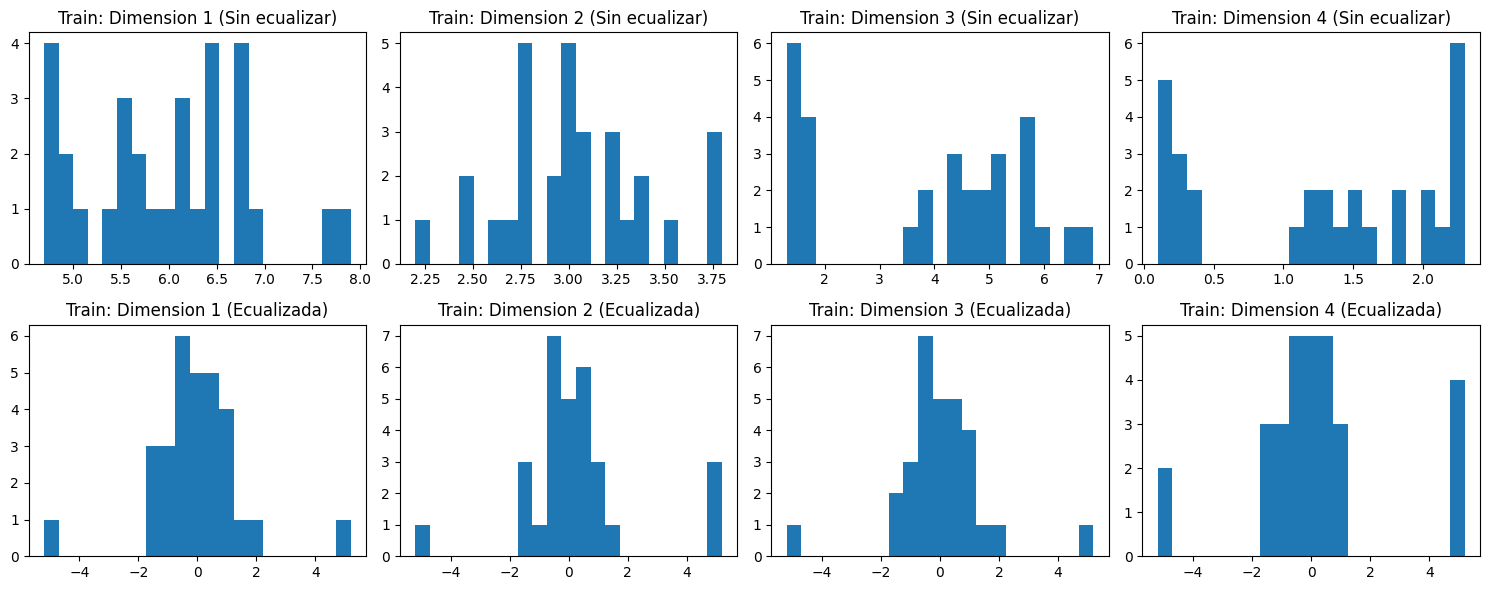

In [60]:
import matplotlib.pyplot as plt

# Inicializar el QuantileTransformer y aplicamos la transformacion
quantile_transformer = QuantileTransformer(random_state=0, output_distribution='normal')
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.fit_transform(X_test)

train_dim = X_train.shape[1]
test_dim = X_test.shape[1]

# Crear una matriz de subtramas
fig1, axes_train = plt.subplots(2, train_dim, figsize=(15, 6))
fig2, axes_test = plt.subplots(2, test_dim, figsize=(15, 6))

# Visualizar los resultados mediante histogramas
for i in range(train_dim):
    # Histograma sin ecualizar
    axes_train[0, i].hist(X_train[:, i], bins=21)
    axes_train[0, i].set_title(f'Test: Dimension {i + 1} (Sin ecualizar)')
    axes_test[0, i].hist(X_test[:, i], bins=21)
    axes_test[0, i].set_title(f'Train: Dimension {i + 1} (Sin ecualizar)')

    # Histograma ecualizada
    axes_train[1, i].hist(X_train_trans[:, i], bins=21)
    axes_train[1, i].set_title(f'Test: Dimension {i + 1} (Ecualizada)')
    axes_test[1, i].hist(X_test_trans[:, i], bins=21)
    axes_test[1, i].set_title(f'Train: Dimension {i + 1} (Ecualizada)')



plt.tight_layout()
plt.show()


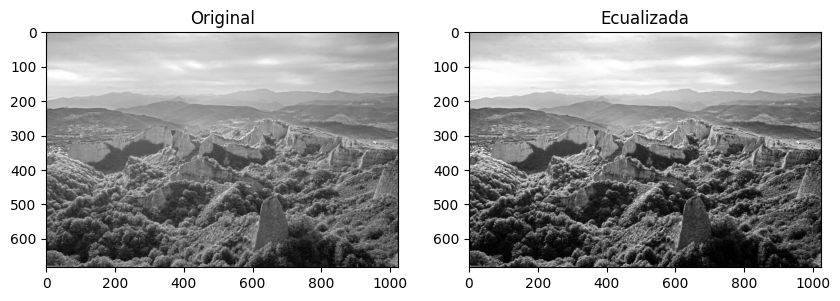

In [82]:
import cv2

# Cargando y aplicando la ecualizacion una imagen
imagen_orig = cv2.imread('imagen1.jpg', cv2.IMREAD_GRAYSCALE)
imagen_ecu = cv2.equalizeHist(imagen_orig)

# Visualizacion la imagen original y la imagen ecualizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_orig, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_ecu, cmap='gray')
plt.title('Ecualizada')

plt.show()


EJERCICIO: Representa gráficamente las relaciones entre variables (puedes usar `plt.imshow`).

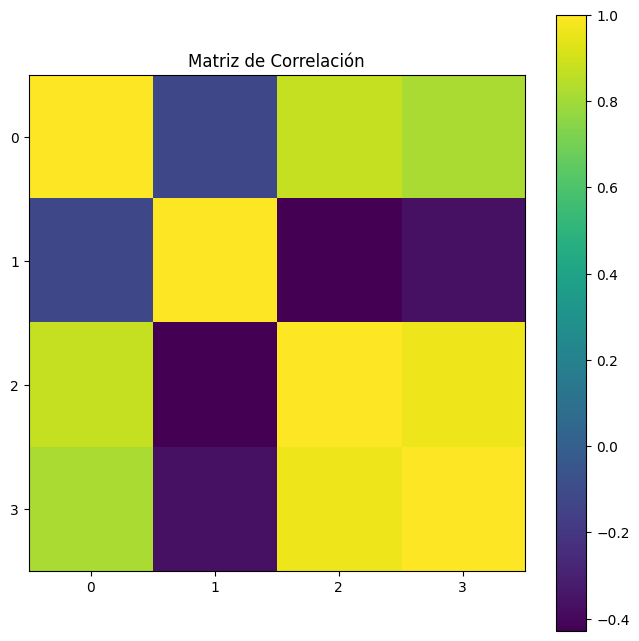

In [96]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# Calcular la matriz de correlación
corr_matrix = np.corrcoef(X, rowvar=False)

# Configurar el mapa de calor
plt.figure(figsize=(8, 8))
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')

plt.title('Matriz de Correlación')
plt.xticks(np.arange(len(corr_matrix)), range(X.shape[1]))
plt.yticks(np.arange(len(corr_matrix)), range(X.shape[1]))
plt.colorbar()

plt.show()


EJERCICIO: Utiliza `KBinsDiscretizer` visto en la primera parte para crear una nueva variable `Xd` discretizando la variable `X`. Utiliza 9 bins.

In [107]:
from sklearn.preprocessing import KBinsDiscretizer
# Ejercicio: jugar con distintos bins. Cuanto más, más fino, pero mayor entropía.
kbd = KBinsDiscretizer(n_bins=9, encode='ordinal')
Xd = kbd.fit_transform(X)

EJERCICIO: Compara el resultado obtenido con el de la implementación de scikit learn sklearn.feature_selection.mutual_info_classif.

In [108]:
# Entropia de las variables //discretas// de salida: J(y) = -sum P(c)log(P(c))
classes = np.unique(y)
# Probablidad de cada classe
py = np.zeros(len(classes))
for nc, c in enumerate(classes):
    py[c] = np.sum(y == c)
# Convertimos en probablididades normalizando por el total
py /= np.sum(py)
# Calculamos la entropía
jy = np.sum(py * np.log(1/py))
print('p(y)', py, 'y entropy', jy)

# Vamos a calcular la MI para cada variable en X
nv = Xd.shape[1]
mi = np.zeros(nv)
# Valores distintos en Xd
xvalues = np.unique(Xd)
for v in range(nv):
    # Calculamos px
    px = np.zeros(len(xvalues))
    # --------------
    for i, value in enumerate(xvalues):
        px[i] = np.sum([Xd[:,v] == value])
    px /= np.sum(px)
    # --------------

    # Calculamos pxy
    pxy = np.zeros((len(xvalues), len(classes)))
    # --------------
    for i, value in enumerate(xvalues):
        for j, cls in enumerate(classes):
            pxy[i,j] = np.sum((Xd[:,v] == value) & (y == cls))
    pxy /= np.sum(pxy)
    # --------------

    # Calculamos MI: sum_x(sum_y( p(x,y) * log(p(x,y) / (p(x)*p(y)) ))
    mi[v] = 0.0
    for i in range(pxy.shape[0]):
        for j in range(pxy.shape[1]):
            # Evitar divisiones por cero y logaritmos = -inf
            if pxy[i,j] > 0 and px[i] > 0 and py[j] > 0:
                # --------------
                mi[v] += pxy[i,j] * np.log(pxy[i,j] / px[i] / py[j])
                # --------------

print(mi)

p(y) [0.33333333 0.33333333 0.33333333] y entropy 1.0986122886681096
[0.5032742  0.31671819 0.98041703 0.97135001]


In [118]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris

Xd, y = load_iris(return_X_y=True)

# Implementación propia de la Información Mutua
def calculate_mi(Xd, y):
    nv = Xd.shape[1]
    mi = np.zeros(nv)

    xvalues = np.unique(Xd)
    classes = np.unique(y)

    py = np.zeros(len(classes))
    for j, cls in enumerate(classes):
        py[j] = np.sum(y == cls)
    py /= np.sum(py)

    # Entropía de las variables discretas de salida
    jy = -np.sum(py * np.log2(py))

    for v in range(nv):
        px = np.zeros(len(xvalues))

        pxy = np.zeros((len(xvalues), len(classes)))

        for i, value in enumerate(xvalues):
            px[i] = np.sum(Xd[:, v] == value)

            for j, cls in enumerate(classes):
                pxy[i, j] = np.sum((Xd[:, v] == value) & (y == cls))

        px /= np.sum(px)
        pxy /= np.sum(pxy)

        mi[v] = 0.0
        for i in range(pxy.shape[0]):
            for j in range(pxy.shape[1]):
                if pxy[i, j] > 0 and px[i] > 0 and py[j] > 0:
                    mi[v] += pxy[i, j] * np.log2(pxy[i, j] / px[i] / py[j])

    return mi

# Calcular la Información Mutua utilizando ambas implementaciones
mi_propia = calculate_mi(Xd, y)
mi_sklearn = mutual_info_classif(Xd, y)

# Imprimir los resultados y comparar
print("Información Mutua (Implementación Propia):", mi_propia)
print("Información Mutua (scikit-learn):", mi_sklearn)

if np.allclose(mi_propia, mi_sklearn):
    print("Los resultados son similares.")
else:
    print("Los resultados son diferentes.")


Información Mutua (Implementación Propia): [0.87693762 0.51664288 1.44631652 1.43589784]
Información Mutua (scikit-learn): [0.48242701 0.18788544 0.98467526 0.98236292]
Los resultados son diferentes.


EJERCICIO: Utiliza sklearn.feature_selection.SelectKBest y mutual_info_classif para seleccionar automáticamente las dos mejores variables.

In [119]:
from sklearn.feature_selection import SelectKBest
Xnew = SelectKBest(mutual_info_classif, k=2).fit_transform(X, y)
Xnew.shape

(150, 2)

EJERCICIO: Prueba una por una las variables de entrada en nuestro myLinearModel. Comprueba los resultados con las funciones fit, predict y score.

In [120]:
# Separamos en entrenamiento y test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)

# Nos aseguramos de que la y tenga dimensión Nx1
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)

# Esto ya existe en sklearn

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
yp = lr.predict(Xtest)
print(lr.score(Xtest, ytest))

# Comprobamos que funciona
model = myLinearModel()
model.fit(Xtrain, ytrain)
yp = model.predict(Xtest)
model.score(ytest, yp)

for i in range(Xtrain.shape[1]):
    mx = myLinearModel()
    mx.fit(Xtrain[:, i, None], ytrain)
    yx = mx.predict(Xtest[:, i, None])
    mx.score(ytest, yx)

0.9148001787320246
MSE 0.057935878462223325
MSE 0.33241996573101124
MSE 0.5031808061110198
MSE 0.07535580338647142
MSE 0.067968640263286


EJERCICIO: Ahora prueba todas las combinaciones de dos variables. Para ello usaremos combinations de la librería itertools.

In [121]:
from itertools import combinations
for c in combinations(range(4), 2):
    mx = myLinearModel()
    mx.fit(Xtrain[:, c], ytrain)
    yx = mx.predict(Xtest[:, c])
    mx.score(ytest, yx)
    print(c)

MSE 0.2311898601353208
(0, 1)
MSE 0.06647351844586159
(0, 2)
MSE 0.07119784460786815
(0, 3)
MSE 0.07561460628811505
(1, 2)
MSE 0.0632691381730795
(1, 3)
MSE 0.06022603025783263
(2, 3)


EJERCICIO: Por ultimo en grupo de 3

In [122]:
from itertools import combinations
for c in combinations(range(4), 3):
    mx = myLinearModel()
    mx.fit(Xtrain[:, c], ytrain)
    yx = mx.predict(Xtest[:, c])
    mx.score(ytest, yx)
    print(c)

MSE 0.06500906332126441
(0, 1, 2)
MSE 0.06829662576762187
(0, 1, 3)
MSE 0.05442726649360354
(0, 2, 3)
MSE 0.05886967013500891
(1, 2, 3)
